# Chapter 03 - Distributions

**Distributions**: Set of possible outcomes
**Probability Mass Function**: For discrete distributions, maps each outcome to a probability

In [1]:
# empiricaldist provides a class claled Pmf
from empiricaldist import Pmf

In [2]:
# Ex: pmf of coin toss
coin = Pmf()
coin["heads"] = 1/2
coin["tails"] = 1/2
coin

,probs
heads,0.5
tails,0.5


In [5]:
# 6 sided die
die_outcome = list(range(1,7))
die = Pmf.from_seq(die_outcome)
die

,probs
1,0.166667
2,0.166667
3,0.166667
4,0.166667
5,0.166667
6,0.166667


In [6]:
letters = Pmf.from_seq(list("Mississippi"))
letters

,probs
M,0.090909
i,0.363636
p,0.181818
s,0.363636


## Cookie Problem - Revisited
Suppose there are two bowls of cookies.

- Bowl 1 contains 30 vanilla cookies and 10 chocolate cookies.
- Bowl 2 contains 20 vanilla cookies and 20 chocolate cookies.

Now suppose you choose one of the bowls at random and, without looking, choose a
cookie at random. If the cookie is vanilla, what is the probability that it came from
Bowl 1?

In [7]:
prior = Pmf.from_seq(["Bowl 1","Bowl 2"])
prior

,probs
Bowl 1,0.5
Bowl 2,0.5


In [8]:
likelihood_vanilla = [0.75,0.5]
posterior = prior * likelihood_vanilla
posterior

,probs
Bowl 1,0.375
Bowl 2,0.250


In [10]:
posterior.normalize()
posterior

,probs
Bowl 1,0.6
Bowl 2,0.4


## 101 Bowl
- Bowl 0, 0% vanilla
- Bowl 1, 1% vanilla ...

Suppose we choose a bowl at random, choose a cookie at random, and it turns out to
be vanilla. What is the probability that the cookie came from Bowl x, for each value of
x?

In [27]:
from matplotlib import pyplot as plt
import numpy as np
hypos = np.arange(101)
prior = Pmf.from_seq(hypos)
prior
# or:
# prior = Pmf(1,hypos) 1=prob for all, hypos the sequence
# prior.normalize()   all 1 become normalized to get the uniform dist.


,probs
0,0.009901
1,0.009901
2,0.009901
3,0.009901
4,0.009901
...,...
96,0.009901
97,0.009901
98,0.009901
99,0.009901


In [24]:
likelihood_vanilla = hypos / 100

In [26]:
posterior1 = prior * likelihood_vanilla
posterior1.normalize()
posterior1.head()

,probs
0,0.000000
1,0.000198
2,0.000396


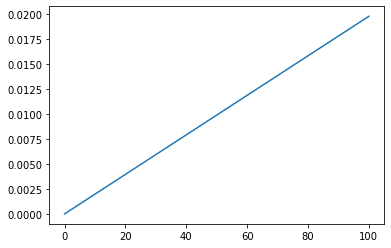

In [29]:
# After 1 vanilla cookie
plt.plot(posterior1)

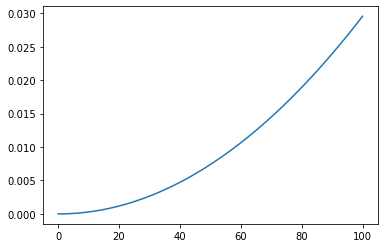

In [30]:
# draw another vanilla cookie
posterior2 = posterior1 * likelihood_vanilla
posterior2.normalize()
plt.plot(posterior2)

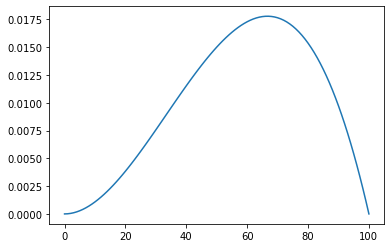

In [33]:
# draw a chocolate cookie
likelihood_chocalate = 1.0 - likelihood_vanilla
posterior3 = posterior2 * likelihood_chocalate
posterior3.normalize()
plt.plot(posterior3)

**MAP**: Maximum a posteori probability

We estimated the proportion of vanilla / chocolate cookies this way.

In [35]:
posterior3.idxmax() # Pandas function
# or
posterior3.max_prob() # Pmf function

67

### The Dice Problem
Suppose I have a box with a 6-sided die, an 8-sided die, and a 12-sided die.
I choose one of the dice at random, roll it, and report that the outcome is a 1.
What is the probability that I chose the 6-sided die

In [41]:
hypos = [6,8,12]
prior = Pmf(1/3,hypos)
prior.qs # quantities

array([ 6,  8, 12], dtype=int64)

In [42]:
prior.ps # probs

array([0.33333333, 0.33333333, 0.33333333])

In [43]:
likelihood1 = 1/6, 1/8, 1/12

In [44]:
posterior = prior * likelihood1
posterior.normalize()
posterior

,probs
6,0.444444
8,0.333333
12,0.222222


In [45]:
# we now roll a 7. Which dice could t be?
likelihood2 = 0,1/8,1/12
posterior *= likelihood2
posterior.normalize()
posterior

,probs
6,0.000000
8,0.692308
12,0.307692


In [46]:
# write a function to update the pmfs
def update_dice(pmf, data):
    hypos = pmf.qs
    likelihood = 1.0 / hypos
    impossible = (data > hypos)
    likelihood[impossible] = 0
    pmf *= likelihood
    pmf.normalize()

In [48]:
pmf = prior.copy()
pmf

,probs
6,0.333333
8,0.333333
12,0.333333


In [49]:
update_dice(pmf,1)
update_dice(pmf,6)
pmf

,probs
6,0.551724
8,0.310345
12,0.137931


In [50]:
update_dice(pmf,6)
update_dice(pmf,6)
pmf


,probs
6,0.725212
8,0.229462
12,0.045326


# Exercises
## Ex 3-1
Suppose I have a box with a 6-sided die, an 8-sided die, and a 12-sided die. I choose
one of the dice at random, roll it four times, and get 1, 3, 5, and 7. What is the proba‐
bility that I chose the 8-sided die?


In [77]:
hypos31 = [6,8,12]
prior = Pmf(1/3, hypos31)
dice_rolled = [1,3,5,7]
for d in dice_rolled:
    update_dice(prior,d)
prior

,probs
6,0.000000
8,0.835052
12,0.164948


## Ex 3-2
Suppose I have a box with a 6-sided die, an 8-sided die, and a 12-sided die. I choose
one of the dice at random, roll it four times, and get 1, 3, 5, and 7. What is the proba‐
bility that I chose the 8-sided die?


In [82]:
hypos32 = [4,6,8,12,20]
p32 = [1,2,3,4,5]
pmf32 = Pmf(p32,hypos32)
pmf32.normalize()
pmf32

,probs
4,0.066667
6,0.133333
8,0.200000
12,0.266667
20,0.333333


In [83]:
update_dice(pmf32,7)
pmf32

,probs
4,0.000000
6,0.000000
8,0.391304
12,0.347826
20,0.260870
